In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

In [2]:
#read datasets of each month

dataset_jan=pd.read_csv("1_2023_113.csv")
dataset_feb=pd.read_csv("2_2023_113.csv")
dataset_mar=pd.read_csv("3_2023_113.csv")
dataset_apr=pd.read_csv("4_2023_113.csv")
dataset_may=pd.read_csv("5_2023_113.csv")
dataset_jun=pd.read_csv("6_2023_113.csv")

In [3]:
#combine all monthly datasets
dataset=pd.concat([dataset_jan,dataset_feb,dataset_mar,dataset_apr,dataset_may,dataset_jun],ignore_index=True)
dataset

,bulk_id,car_reg_no,vehicle_speed,heading,distance,altitude,o_s1_b1_voltage,o_s2_b2_voltage,o_s1_current,calculated_engine_load,...,egr_error,absolute_barometric_pressure,engine_coolant_temperature,intake_air_temperature,catalyst_temperature_b1_s1,catalyst_temperature_b1_s2,ambient_air_temperature,time_stamp,latitude,longitude
0,6266061,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-01-30 23:17:10,0.000000,0.00000
1,6266060,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-01-30 23:17:08,0.000000,0.00000
2,6266059,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-01-30 23:17:06,0.000000,0.00000
3,6266058,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-01-30 23:17:03,0.000000,0.00000
4,6266057,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-01-30 23:17:01,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212500,6463303,113,0.0,0.0,NaN,0.0,NaN,0.78,0.0,60.7843,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-03 20:23:57,0.000000,0.00000
212501,6463302,113,0.0,0.0,NaN,5.1,NaN,0.78,0.0,60.7843,...,NaN,99.0,91.0,47.0,0.0,0.0,35.0,2023-06-03 20:23:55,24.925262,67.10289
212502,6463301,113,0.0,0.0,NaN,5.1,NaN,0.80,0.0,61.1765,...,NaN,99.0,91.0,47.0,0.0,0.0,35.0,2023-06-03 20:23:53,24.925262,67.10289
212503,6463300,113,0.0,0.0,NaN,0.0,NaN,0.80,0.0,61.1765,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-03 20:23:51,0.000000,0.00000


In [4]:
dataset_jan.shape

(36157, 41)

In [5]:
dataset_apr.shape

(31671, 41)

In [6]:
dataset_may.shape

(44252, 41)

In [7]:
dataset['vehicle_speed'].isnull().sum()

np.int64(0)

In [8]:
# Convert time_stamp to datetime
dataset_feb['time_stamp'] = pd.to_datetime(dataset_feb['time_stamp'])

# Sort by time just in case
dataset_feb = dataset_feb.sort_values(by='time_stamp')

# Compute time difference in hours between consecutive rows
dataset_feb['time_diff'] = dataset_feb['time_stamp'].diff().dt.total_seconds() / 3600  # Convert seconds to hours

# Convert speed from m/s to km/h
dataset_feb['vehicle_speed_kmh'] = dataset_feb['vehicle_speed'] * 3.6


# Calculate distance using speed 
dataset_feb['estimated_distance'] = dataset_feb['vehicle_speed_kmh'] * dataset_feb['time_diff']

# Sum up the total distance for this month
total_distance = dataset_feb['estimated_distance'].sum(skipna=True)
total_distance


np.float64(1101.4160000000002)

In [9]:
dataset_apr


,bulk_id,car_reg_no,vehicle_speed,heading,distance,altitude,o_s1_b1_voltage,o_s2_b2_voltage,o_s1_current,calculated_engine_load,...,egr_error,absolute_barometric_pressure,engine_coolant_temperature,intake_air_temperature,catalyst_temperature_b1_s1,catalyst_temperature_b1_s2,ambient_air_temperature,time_stamp,latitude,longitude
0,6418975,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-27 22:15:30,0.0,0.0
1,6418974,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-27 22:15:20,0.0,0.0
2,6418973,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-27 22:15:18,0.0,0.0
3,6418972,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-27 22:15:13,0.0,0.0
4,6418971,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-27 22:15:11,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31666,6387251,113,8.0,0.0,NaN,0.0,NaN,0.095,0.0,49.4118,...,NaN,100.0,81.0,35.0,0.0,0.0,28.0,2023-04-02 17:15:25,0.0,0.0
31667,6387250,113,8.0,0.0,NaN,0.0,NaN,0.075,0.0,40.3922,...,NaN,100.0,81.0,35.0,0.0,0.0,28.0,2023-04-02 17:15:23,0.0,0.0
31668,6387249,113,20.0,0.0,NaN,0.0,NaN,0.075,0.0,40.3922,...,NaN,100.0,82.0,35.0,0.0,0.0,28.0,2023-04-02 17:15:21,0.0,0.0
31669,6387248,113,0.0,0.0,NaN,0.0,NaN,0.015,0.0,41.1765,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-02 17:15:19,0.0,0.0


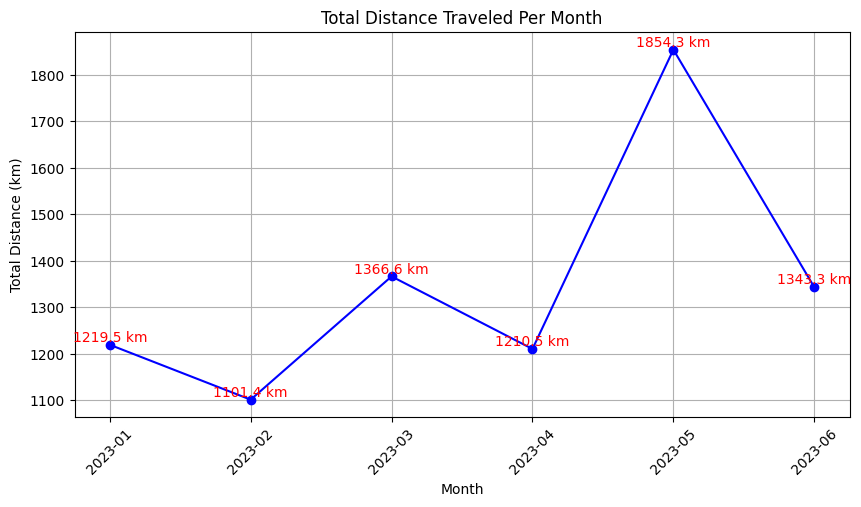

In [10]:

dataset = dataset.sort_values(by='time_stamp')


# Convert time_stamp to datetime
dataset['time_stamp'] = pd.to_datetime(dataset['time_stamp'])

# Convert speed from m/s to km/h
dataset['vehicle_speed_kmh'] = dataset['vehicle_speed'] * 3.6

# Compute time difference in hours
dataset['time_diff'] = dataset['time_stamp'].diff().dt.total_seconds() / 3600

# Calculate estimated distance
dataset['estimated_distance_km'] = dataset['vehicle_speed_kmh'] * dataset['time_diff']

# Extract year and month
dataset['year_month'] = dataset['time_stamp'].dt.to_period('M')

# Group by month and sum total distance
monthly_distance = dataset.groupby('year_month')['estimated_distance_km'].sum()

# Convert PeriodIndex to string for plotting
monthly_distance.index = monthly_distance.index.astype(str)

# Plot the monthly distance graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_distance.index, monthly_distance.values, marker='o', linestyle='-', color='b')
# Add labels to each data point
for i, txt in enumerate(monthly_distance.values):
    plt.text(monthly_distance.index[i], txt, f'{txt:.1f} km', ha='center', va='bottom', fontsize=10, color='red')

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Distance (km)")
plt.title("Total Distance Traveled Per Month")
plt.grid(True)
plt.show()


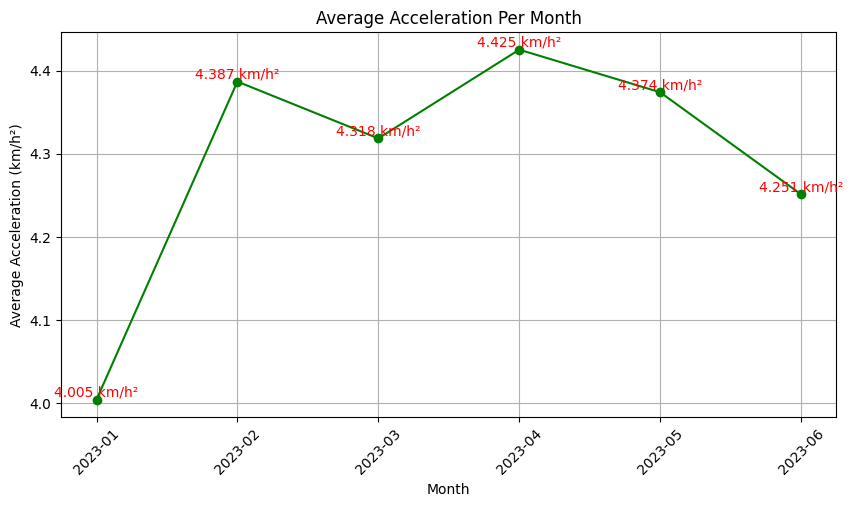

In [11]:


# Convert time_stamp to datetime and sort values
dataset['time_stamp'] = pd.to_datetime(dataset['time_stamp'])
dataset = dataset.sort_values(by='time_stamp')

# Convert speed from m/s to km/h
dataset['vehicle_speed_kmh'] = dataset['vehicle_speed'] * 3.6

# Calculate time difference in seconds
dataset['time_diff_sec'] = dataset['time_stamp'].diff().dt.total_seconds()

# Remove zero or negative time differences
dataset = dataset[dataset['time_diff_sec'] > 0]

# Compute acceleration (change in speed / change in time)
dataset['acceleration'] = (dataset['vehicle_speed_kmh'].diff()) / dataset['time_diff_sec']

# Take the absolute acceleration values (optional but useful)
dataset['acceleration'] = dataset['acceleration'].abs()

# Extract year and month
dataset['year_month'] = dataset['time_stamp'].dt.to_period('M')

# Group by month and calculate the mean acceleration
monthly_acceleration = dataset.groupby('year_month')['acceleration'].mean()

# Convert PeriodIndex to string for plotting
monthly_acceleration.index = monthly_acceleration.index.astype(str)

# Plot the monthly acceleration graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_acceleration.index, monthly_acceleration.values, marker='o', linestyle='-', color='g')

# Add labels to each data point
for i, txt in enumerate(monthly_acceleration.values):
    plt.text(monthly_acceleration.index[i], txt, f'{txt:.3f} km/h²', ha='center', va='bottom', fontsize=10, color='red')

# Customize graph appearance
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Average Acceleration (km/h²)")
plt.title("Average Acceleration Per Month")
plt.grid(True)

# Show the graph
plt.show()
